## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
# Study data files
mouse_metadata = "../Data/Mouse_metadata.csv"
study_results = "../Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
study_dataset = pd.merge(mouse_metadata, study_results, on="Mouse ID")
study_dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Groupby the Drug Regimen
study_group = study_dataset.groupby("Drug Regimen")
study_group["Tumor Volume (mm3)"].describe()
study_group_df = study_group["Tumor Volume (mm3)"].describe()
#Add columns to separate dataframe using groupby object with median, 
study_group_df["SEM"] = study_group.sem()["Tumor Volume (mm3)"]
study_group_df["Variance"] = study_group.var()["Tumor Volume (mm3)"]
study_group_df["Median"] = study_group.median()["Tumor Volume (mm3)"]
study_group_df

,count,mean,std,min,25%,50%,75%,max,SEM,Variance,Median
Drug Regimen,,,,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209,0.329346,24.947764,41.557809
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185,0.469821,39.290177,51.776157
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731,0.492236,43.128684,51.820584
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014,0.603860,68.553577,53.698743
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817,0.596466,66.173479,52.509285
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939,0.581331,61.168083,52.288934
Propriva,161.0,52.322552,6.507770,45.000000,47.081086,50.854632,56.184664,72.455421,0.512884,42.351070,50.854632
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816,0.320955,23.486704,40.673236
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690,0.573111,59.450562,52.431737


## Bar plots

Text(0, 0.5, 'Number of Tests')

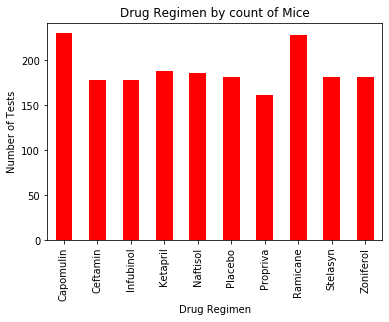

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_plot = study_group.count()["Mouse ID"]
plot = bar_plot.plot(kind='bar',facecolor='red', title = "Drug Regimen by count of Mice")
plot.set_ylabel("Number of Tests")

Text(0, 0.5, 'Number of Tests')

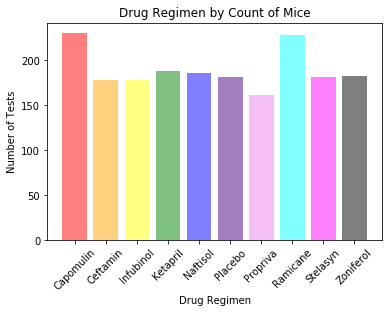

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(study_group_df))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, study_group_df['count'], color=("red", "orange", "yellow", "green","blue", "indigo", "violet","cyan","magenta", "black"), alpha=0.5, align= "center")
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])
plt.xticks(rotation = 45)

plt.title("Drug Regimen by Count of Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Tests")

## Pie plots

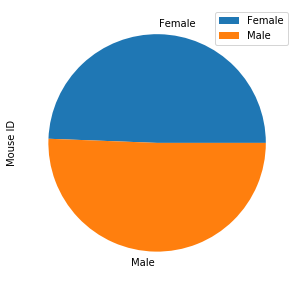

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = study_dataset.groupby("Sex").count()
gender_group
female_mice = 935
plot = gender_group.plot.pie(y='Mouse ID', figsize=(5, 5))

([<matplotlib.patches.Wedge at 0x24ee047fa48>,
 [Text(-0.7230187918402546, -0.8290017048509964, 'Female'),
  Text(0.7230187918402547, 0.8290017048509963, 'Male')],
 [Text(-0.39437388645832067, -0.4521827481005435, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

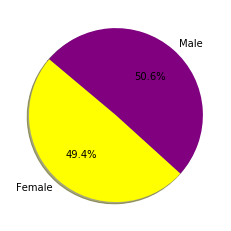

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = ["Female", "Male"]
colors = ["Yellow", "Purple"]
sex_count = [935, 958]
plt.pie(sex_count, labels=sex, colors = colors, autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# make a dataframe to see which drug regimen was the most successful
top_4 = study_group_df.sort_values("mean", ascending=False).nsmallest(4, "mean")
top_4
best_drugs = study_dataset.loc[(study_dataset["Drug Regimen"] == "Ramicane") | (study_dataset["Drug Regimen"] == "Capomulin") | (study_dataset["Drug Regimen"] == "Propriva") | (study_dataset["Drug Regimen"] == "Coftamin")]
best_drugs
#make a new groupby object to get the final tumor volumes
best_drugs_group = best_drugs.groupby(["Mouse ID"])
best_drugs_df = best_drugs_group.max()
best_drugs_df
merged_df = pd.merge(best_drugs, best_drugs_df, on="Mouse ID", how="outer")
merged_df

max_best_drugs = merged_df.loc[(merged_df["Timepoint_x"] == merged_df["Timepoint_y"])]
max_best_drugs

final_df = max_best_drugs[['Mouse ID', 'Tumor Volume (mm3)_x']]
final_df

,Mouse ID,Tumor Volume (mm3)_x
9,k403,22.050126
19,s185,23.343598
29,x401,28.484033
39,m601,28.430964
49,g791,29.128472
...,...,...
607,w350,64.957562
609,w746,49.453270
612,x111,49.122969
615,x209,48.929895


In [10]:
#Calculate the IQR and quantitatively determine if there are any potential outliers

final_volumes = final_df['Tumor Volume (mm3)_x']
quartiles = final_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of final tumor size is: {lowerq}")
print(f"The upper quartile of final tumor size is: {upperq}")
print(f"The interquartile range of final tumor size is: {iqr}")
print(f"The the median of final tumor size is: {quartiles[0.5]} ")

#find the upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
#Find any potential outliers
outliers = final_df.loc[(final_df['Tumor Volume (mm3)_x'] > upper_bound) | (final_df['Tumor Volume (mm3)_x'] < lower_bound)]
outliers
print(f"There are {len(outliers)} outliers.")

The lower quartile of final tumor size is: 35.248172675
The upper quartile of final tumor size is: 49.116509320000006
The interquartile range of final tumor size is: 13.868336645000007
The the median of final tumor size is: 40.65812366 
Values below 14.44566770749999 could be outliers.
Values above 69.91901428750002 could be outliers.
There are 3 outliers.


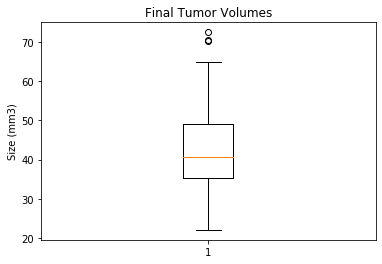

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_ylabel('Size (mm3)')
ax1.boxplot(final_volumes)
plt.show()

## Line and scatter plots

Text(0, 0.5, 'Tumor in mm3')

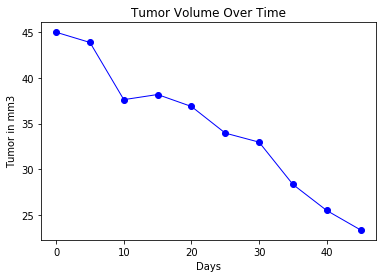

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
weight_only = study_dataset[["Drug Regimen", "Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
Capomulin = study_dataset.loc[(study_dataset["Drug Regimen"] == "Capomulin") & (study_dataset["Mouse ID"] == "s185")]
Capomulin
x_axis = Capomulin["Timepoint"]
y_axis = Capomulin["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, marker="o",color="blue", linewidth=1)
plt.title("Tumor Volume Over Time")
plt.xlabel("Days")
plt.ylabel("Tumor in mm3")

Text(0, 0.5, 'Tumor Volume (mm3)')

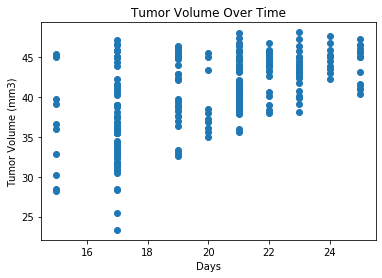

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_only = study_dataset[["Drug Regimen", "Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
Capomulin = study_dataset.loc[(study_dataset["Drug Regimen"] == "Capomulin")]
Capomulin
x_axis = Capomulin["Weight (g)"]
y_axis = Capomulin["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis, marker = "o")
plt.title("Tumor Volume Over Time")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")

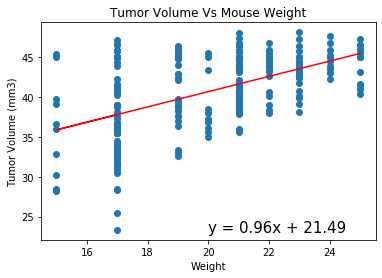

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#Define our values
x_axis = Capomulin["Weight (g)"]
y_axis = Capomulin["Tumor Volume (mm3)"]

#Find the linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

#Make the equation for the linear regression line
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot labels
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_equation,(20,23),fontsize=15,color="black")
plt.title("Tumor Volume Vs Mouse Weight")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.show()